In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import digamma
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use("ggplot")

# 2次元ガウス分布の分解近似

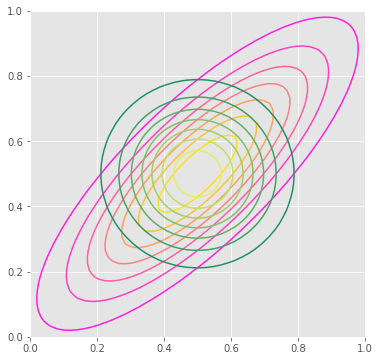

In [5]:
mu = np.array([0.5, 0.5])

A = np.array([[50,-40],
              [-40,50]])

def multi_gauss(x,y):
  return stats.multivariate_normal(mu, np.linalg.inv(A)).pdf([x,y])

def multi_gauss_approximate(x,y):
  return stats.norm(mu[0], np.sqrt(1./A[0,0])).pdf(x) * stats.norm(mu[1], np.sqrt(1./A[1,1])).pdf(y)

plt.figure(figsize=(6,6))

X, Y = np.meshgrid(np.linspace(0,1), np.linspace(0,1))
Z1 = np.vectorize(multi_gauss)(X,Y)
Z2 = np.vectorize(multi_gauss_approximate)(X,Y)

plt.contour(X,Y,Z1, cmap=cm.spring)
plt.contour(X,Y,Z2, cmap=cm.summer)
plt.show()

## gamma function

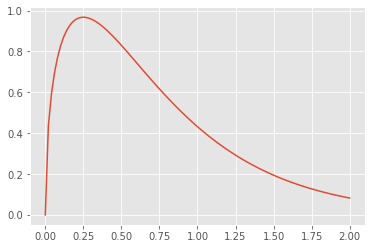

In [6]:
x = np.linspace(0,2,100)
y = stats.gamma.pdf(x, 1.5, scale=0.5)
plt.plot(x,y)
plt.show()

## 一変数ガウス分布の近似

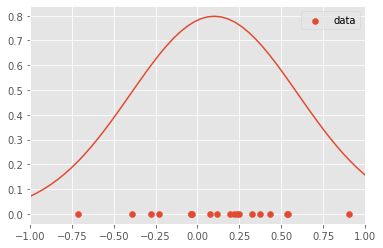

In [9]:
N = 20
sigma = 0.5
mu = 0.1
x = np.linspace(-1,1)
y = stats.norm(mu, sigma).pdf(x)
plt.plot(x,y)
data_x = np.random.normal(mu, sigma, N)
data_y = np.zeros(N)
plt.scatter(data_x, data_y, label="data")
plt.xlim(-1,1)
plt.legend()
plt.show()

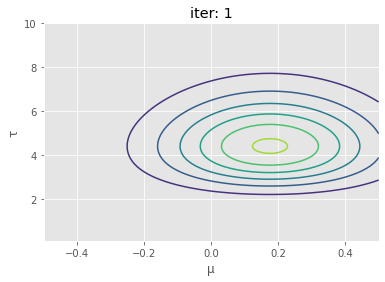

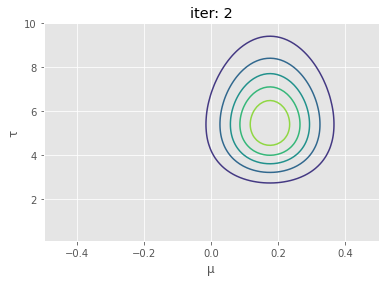

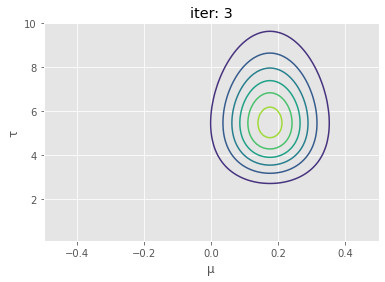

In [20]:
def posterior(mu, tau):
  return stats.norm(mu_N, np.sqrt(1/lam_N)).pdf(mu) * stats.gamma.pdf(tau, a_N, 0, 1/b_N)

E_tau = 1.
for i in range(3):
  mu_N = data_x.sum() / N
  lam_N = N * E_tau

  a_N = (N+1) / 2.
  b_N = (np.average(data_x ** 2) - np.average(data_x) ** 2 + 1/(N * E_tau)) * N / 2
 
  E_tau = a_N / b_N

 
  X, Y = np.meshgrid(np.linspace(-0.5, 0.5, 100), np.linspace(0.1, 10, 100))
  Z = np.vectorize(posterior)(X, Y)
 
  plt.contour(X, Y, Z)
  plt.title("iter: {}".format(i+1))
  plt.xlabel(u"μ")
  plt.ylabel(u"τ")
  plt.show()

## 厳密解

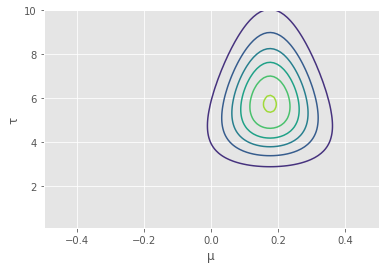

In [22]:
def gauss_gamma(x,y):
  b = (data_x ** 2).sum() / 2 - mu_N ** 2 * N / 2.
  return stats.norm(mu_N, np.sqrt(1/(y*N))).pdf(x) * stats.gamma.pdf(y, N/2., 0, 1/b)

X, Y = np.meshgrid(np.linspace(-0.5, 0.5, 100), np.linspace(0.1, 10, 100))
Z = np.vectorize(gauss_gamma)(X, Y)
 
plt.contour(X, Y, Z)
plt.xlabel(u"μ")
plt.ylabel(u"τ")
plt.show()